# Author: Ian Jones
# Date: 8-15-22
# Goal: Load cibersort result and make an readable plot

# Read in Files

In [1]:
# CiberSort Output
CB.Output <- '/shen/shenlabstore3/ijones1/ShenAnalysis/NeuroHub/Scripts/RNA-seq/CiberSort/Results/CIBERSORTx_Job12_Results.csv'

In [2]:
# RNA Labels
RNA.lab <- '/shen/shenlabstore3/ijones1/ShenAnalysis/NeuroHub/Scripts/RNA-seq/CiberSort/NH.RNA.Label.csv'

In [3]:
# Output File Locations
output <-  '/shen/shenlabstore3/ijones1/ShenAnalysis/NeuroHub/Scripts/RNA-seq/CiberSort/Output/CiberSort.NH.Result.pdf'

# Load libraries

In [4]:
# Read in packages
library('bedtoolsr')
library('dplyr')
library('tidyr')
library(data.table)
library(ggplot2)
library("UpSetR")
library("ComplexHeatmap")
library(gprofiler2)
library("ggrepel")

library(RColorBrewer)
library(viridis)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Loading required package: viridisLite



# Read in CiberSort data

In [5]:
df <- read.csv(CB.Output)
df
df <- df[c(1:14),]
df

Mixture,EN,tRG,IPC,oRG,vRG,OPC,Astrocyte,Microglia,P.value,Correlation,RMSE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
IJ344,0.000000000,0.38249208,0.042194258,0.15225503,0.41913263,0.0038804895,0.0000000000,4.550581e-05,0,0.8177228,0.6691088
IJ345,0.000000000,0.11142037,0.007213472,0.38554869,0.47725283,0.0031718044,0.0153928305,0.000000e+00,0,0.8574631,0.6212590
IJ346,0.008326802,0.01347180,0.012620468,0.02071144,0.00000000,0.0000000000,0.0013459253,9.435236e-01,0,0.8806754,1.1053623
IJ347,0.019617027,0.01719023,0.000000000,0.00000000,0.11294007,0.6058887348,0.2443639345,0.000000e+00,0,0.7524941,0.6999522
JJ027,0.000000000,0.14420349,0.010483320,0.33262829,0.49157570,0.0127331544,0.0083760379,0.000000e+00,0,0.8729001,0.6129866
JJ028,0.076832922,0.30496497,0.034048202,0.17788284,0.38620652,0.0189072273,0.0000000000,1.157322e-03,0,0.8716937,0.6305635
JJ029,0.022384564,0.01978031,0.014050488,0.02425116,0.00000000,0.0000000000,0.0006097883,9.189237e-01,0,0.9115589,1.0068381
JJ031,0.021886170,0.05322679,0.000000000,0.03826698,0.10762320,0.4472933108,0.3313388389,3.647129e-04,0,0.7259461,0.7350349
JJ096,0.018259543,0.01919669,0.004511412,0.02156594,0.00000000,0.0000000000,0.0048508920,9.316155e-01,0,0.8101938,1.1981156


,Mixture,EN,tRG,IPC,oRG,vRG,OPC,Astrocyte,Microglia,P.value,Correlation,RMSE
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,IJ344,0.000000000,0.38249208,0.042194258,0.15225503,0.41913263,0.0038804895,0.0000000000,4.550581e-05,0,0.8177228,0.6691088
2,IJ345,0.000000000,0.11142037,0.007213472,0.38554869,0.47725283,0.0031718044,0.0153928305,0.000000e+00,0,0.8574631,0.6212590
3,IJ346,0.008326802,0.01347180,0.012620468,0.02071144,0.00000000,0.0000000000,0.0013459253,9.435236e-01,0,0.8806754,1.1053623
4,IJ347,0.019617027,0.01719023,0.000000000,0.00000000,0.11294007,0.6058887348,0.2443639345,0.000000e+00,0,0.7524941,0.6999522
5,JJ027,0.000000000,0.14420349,0.010483320,0.33262829,0.49157570,0.0127331544,0.0083760379,0.000000e+00,0,0.8729001,0.6129866
6,JJ028,0.076832922,0.30496497,0.034048202,0.17788284,0.38620652,0.0189072273,0.0000000000,1.157322e-03,0,0.8716937,0.6305635
7,JJ029,0.022384564,0.01978031,0.014050488,0.02425116,0.00000000,0.0000000000,0.0006097883,9.189237e-01,0,0.9115589,1.0068381
8,JJ031,0.021886170,0.05322679,0.000000000,0.03826698,0.10762320,0.4472933108,0.3313388389,3.647129e-04,0,0.7259461,0.7350349
9,JJ096,0.018259543,0.01919669,0.004511412,0.02156594,0.00000000,0.0000000000,0.0048508920,9.316155e-01,0,0.8101938,1.1981156


# Read in Labels

In [6]:
Lab <- read.csv(RNA.lab)
Lab

Mixture,Donor_ID,GW,Cell_Type
<chr>,<chr>,<chr>,<chr>
IJ344,ARK-2021-002,GW15,vRG
IJ345,ARK-2021-002,GW15,oRG
IJ346,ARK-2021-005,GW23,MG
IJ347,ARK-2021-005,GW23,OPC
JJ027,ARK-2021-010,GW15,oRG
JJ028,ARK-2021-010,GW15,vRG
JJ029,ARK-2021-009,GW22,MG
JJ030,ARK-2021-009,GW22,MG
JJ031,ARK-2021-009,GW22,OPC


# Use Pheatmap to plot Cibersort output

In [7]:
# combine label and output
df_lab <- inner_join(df, Lab)
df_lab

Joining with `by = join_by(Mixture)`


Mixture,EN,tRG,IPC,oRG,vRG,OPC,Astrocyte,Microglia,P.value,Correlation,RMSE,Donor_ID,GW,Cell_Type
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
IJ344,0.000000000,0.38249208,0.042194258,0.15225503,0.41913263,0.0038804895,0.0000000000,4.550581e-05,0,0.8177228,0.6691088,ARK-2021-002,GW15,vRG
IJ345,0.000000000,0.11142037,0.007213472,0.38554869,0.47725283,0.0031718044,0.0153928305,0.000000e+00,0,0.8574631,0.6212590,ARK-2021-002,GW15,oRG
IJ346,0.008326802,0.01347180,0.012620468,0.02071144,0.00000000,0.0000000000,0.0013459253,9.435236e-01,0,0.8806754,1.1053623,ARK-2021-005,GW23,MG
IJ347,0.019617027,0.01719023,0.000000000,0.00000000,0.11294007,0.6058887348,0.2443639345,0.000000e+00,0,0.7524941,0.6999522,ARK-2021-005,GW23,OPC
JJ027,0.000000000,0.14420349,0.010483320,0.33262829,0.49157570,0.0127331544,0.0083760379,0.000000e+00,0,0.8729001,0.6129866,ARK-2021-010,GW15,oRG
JJ028,0.076832922,0.30496497,0.034048202,0.17788284,0.38620652,0.0189072273,0.0000000000,1.157322e-03,0,0.8716937,0.6305635,ARK-2021-010,GW15,vRG
JJ029,0.022384564,0.01978031,0.014050488,0.02425116,0.00000000,0.0000000000,0.0006097883,9.189237e-01,0,0.9115589,1.0068381,ARK-2021-009,GW22,MG
JJ031,0.021886170,0.05322679,0.000000000,0.03826698,0.10762320,0.4472933108,0.3313388389,3.647129e-04,0,0.7259461,0.7350349,ARK-2021-009,GW22,OPC
JJ096,0.018259543,0.01919669,0.004511412,0.02156594,0.00000000,0.0000000000,0.0048508920,9.316155e-01,0,0.8101938,1.1981156,ARK-2021-014,GW23,MG


In [8]:
# Reorder based on cell types
df_lab$Cell_Type <- factor(df_lab$Cell_Type,
                           levels = rev(c('MG','OPC','oRG','vRG')))
df_lab_sort <- df_lab[order(df_lab$Cell_Type),]
head(df_lab_sort)

,Mixture,EN,tRG,IPC,oRG,vRG,OPC,Astrocyte,Microglia,P.value,Correlation,RMSE,Donor_ID,GW,Cell_Type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,IJ344,0.00000000,0.3824921,0.042194258,0.1522550,0.4191326,0.003880489,0.000000000,4.550581e-05,0,0.8177228,0.6691088,ARK-2021-002,GW15,vRG
6,JJ028,0.07683292,0.3049650,0.034048202,0.1778828,0.3862065,0.018907227,0.000000000,1.157322e-03,0,0.8716937,0.6305635,ARK-2021-010,GW15,vRG
12,JJ102,0.00000000,0.3843010,0.008409957,0.2338019,0.2739477,0.038456442,0.059876105,1.206997e-03,0,0.7563460,0.7220424,ARK-2021-008,GW18,vRG
14,JJ185,0.06384170,0.2489679,0.022752441,0.1926753,0.1270049,0.111863964,0.231712342,1.181463e-03,0,0.7044479,0.7640489,ARK-2021-013,GW18,vRG
2,IJ345,0.00000000,0.1114204,0.007213472,0.3855487,0.4772528,0.003171804,0.015392830,0.000000e+00,0,0.8574631,0.6212590,ARK-2021-002,GW15,oRG
5,JJ027,0.00000000,0.1442035,0.010483320,0.3326283,0.4915757,0.012733154,0.008376038,0.000000e+00,0,0.8729001,0.6129866,ARK-2021-010,GW15,oRG


In [9]:
# Change row names to sample ID's
rownames(df_lab_sort) <- df_lab_sort$Mixture

In [10]:
# Make annotation DF
anno_df <- df_lab_sort[,c('GW','Cell_Type')]

In [11]:
ann_colors = list(
    # Donor_ID = c('ARK-2021-002'="goldenrod1",'ARK-2021-005'="goldenrod2",'ARK-2021-008'="goldenrod3",'ARK-2021-009'="darkgoldenrod3",'ARK-2021-010'="goldenrod4",'ARK-2021-014'="darkgoldenrod4"),
    GW = c(GW15='#FEE391', GW18='#FB9A29',GW22='#CC4C02',GW23='#662506'),
    Cell_Type = c(MG = '#762A83', OPC = '#1B7837', oRG = '#B2182B', vRG = '#2166AC')
)

In [12]:
ann_colors

$GW
     GW15      GW18      GW22      GW23 
"#FEE391" "#FB9A29" "#CC4C02" "#662506" 

$Cell_Type
       MG       OPC       oRG       vRG 
"#762A83" "#1B7837" "#B2182B" "#2166AC"

In [13]:
# Make matrix for pheatmap
plot_df <- df_lab_sort[,c('vRG','tRG','oRG','Astrocyte','OPC','Microglia','IPC','EN')]
head(plot_df)

,vRG,tRG,oRG,Astrocyte,OPC,Microglia,IPC,EN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IJ344,0.4191326,0.3824921,0.1522550,0.000000000,0.003880489,4.550581e-05,0.042194258,0.00000000
JJ028,0.3862065,0.3049650,0.1778828,0.000000000,0.018907227,1.157322e-03,0.034048202,0.07683292
JJ102,0.2739477,0.3843010,0.2338019,0.059876105,0.038456442,1.206997e-03,0.008409957,0.00000000
JJ185,0.1270049,0.2489679,0.1926753,0.231712342,0.111863964,1.181463e-03,0.022752441,0.06384170
IJ345,0.4772528,0.1114204,0.3855487,0.015392830,0.003171804,0.000000e+00,0.007213472,0.00000000
JJ027,0.4915757,0.1442035,0.3326283,0.008376038,0.012733154,0.000000e+00,0.010483320,0.00000000


In [14]:
# quantile_breaks of colors
quantile_breaks <- function(xs, n = 20) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n),na.rm=T)
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(as.matrix(plot_df), n = 5)
my.colors <- colorRampPalette(colors = c("lightblue", "white","orange", "red", "darkred"))(length(mat_breaks))


In [15]:
# Different Breaks
mat_breaks <- c(0,0.2,0.4,0.6,0.8)
my.colors <- colorRampPalette(colors = c("lightblue", "white","orange", "red", "darkred"))(length(mat_breaks))


In [16]:
nightfall <-c('#3B4CC0', '#8db0fe','#dddddd','#f49a7b', '#b40426')
length(nightfall)
my.colors <- colorRampPalette(nightfall)(100)
length(my.colors)

mat_breaks <- seq(0,0.5, length.out=100)
length(mat_breaks)

[1] 5

[1] 100

[1] 100

In [17]:
plot_df

,vRG,tRG,oRG,Astrocyte,OPC,Microglia,IPC,EN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IJ344,0.41913263,0.38249208,0.15225503,0.0000000000,0.0038804895,4.550581e-05,0.042194258,0.000000000
JJ028,0.38620652,0.30496497,0.17788284,0.0000000000,0.0189072273,1.157322e-03,0.034048202,0.076832922
JJ102,0.27394768,0.38430095,0.23380187,0.0598761048,0.0384564421,1.206997e-03,0.008409957,0.000000000
JJ185,0.12700489,0.24896788,0.19267532,0.2317123420,0.1118639638,1.181463e-03,0.022752441,0.063841700
IJ345,0.47725283,0.11142037,0.38554869,0.0153928305,0.0031718044,0.000000e+00,0.007213472,0.000000000
JJ027,0.49157570,0.14420349,0.33262829,0.0083760379,0.0127331544,0.000000e+00,0.010483320,0.000000000
JJ101,0.31291018,0.03638749,0.51669876,0.1218545573,0.0005994354,0.000000e+00,0.011549579,0.000000000
JJ184,0.22928888,0.05979980,0.45400140,0.2514351283,0.0037750790,1.699715e-03,0.000000000,0.000000000
IJ347,0.11294007,0.01719023,0.00000000,0.2443639345,0.6058887348,0.000000e+00,0.000000000,0.019617027


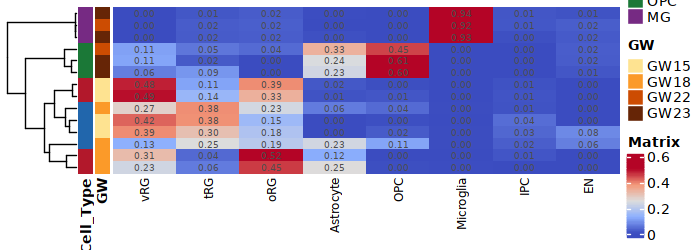

In [29]:
options(repr.plot.width = 7, repr.plot.height = 2.5, repr.plot.res = 100)
p <- pheatmap(as.matrix(plot_df), row_title = NULL,
 cluster_rows=TRUE, cluster_cols=FALSE, annotation_row = anno_df,  show_rownames = F, border_color = NA, breaks=mat_breaks, color = my.colors,
              display_numbers = TRUE, annotation_colors = ann_colors, fontsize=8)
p

In [30]:
pdf(output, width=7,height = 2.5)
p
dev.off()

png 
  2